In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [2]:
# Parameters
product = {"nb": "/Users/macpro/Documents/GitHub/soZCqCfU4mL5ppCX/notebooks/predict_model.ipynb"}


In [3]:
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def plot_characteristics(high_priority_customers):

    """

    This function plots the characteristics of high priority customers.

    Args:
        high_priority_customers (pandas.DataFrame): DataFrame containing the characteristics of high priority customers

    """

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
    fig.suptitle('High Priority Customer Characteristics', fontsize=16, y=1.03)
    # Job
    sns.countplot(x='job', data=high_priority_customers, ax=axes[0, 0], order=high_priority_customers['job'].value_counts().index)
    axes[0, 0].set_title('Job type')
    axes[0, 0].tick_params(axis='x', rotation=90)

    # Education
    sns.countplot(x='education', data=high_priority_customers, ax=axes[0, 1])
    axes[0, 1].set_title('Education level')
    axes[0, 1].tick_params(axis='x', rotation=90)

    # Marital
    sns.countplot(x='marital', data=high_priority_customers, ax=axes[0, 2], order=high_priority_customers['marital'].value_counts().index)
    axes[0, 2].set_title('Marital status')
    axes[0, 2].tick_params(axis='x', rotation=90)

    # Default
    sns.countplot(x='default', data=high_priority_customers, ax=axes[1, 0], order=high_priority_customers['default'].value_counts().index)
    axes[1, 0].set_title('Default status')
    axes[1, 0].tick_params(axis='x', rotation=90)

    # Housing
    sns.countplot(x='housing', data=high_priority_customers, ax=axes[1, 1], order=high_priority_customers['housing'].value_counts().index)
    axes[1, 1].set_title('Housing loan')
    axes[1, 1].tick_params(axis='x', rotation=90)

    # Loan
    sns.countplot(x='loan', data=high_priority_customers, ax=axes[1, 2], order=high_priority_customers['loan'].value_counts().index)
    axes[1, 2].set_title('Loan status')
    axes[1, 2].tick_params(axis='x', rotation=90)

    plt.tight_layout()

    # Save the plot
    plt.savefig(os.path.abspath(os.path.join(os.getcwd(),  'reports', 'figures', 'customer-segmentation.png')), bbox_inches='tight')

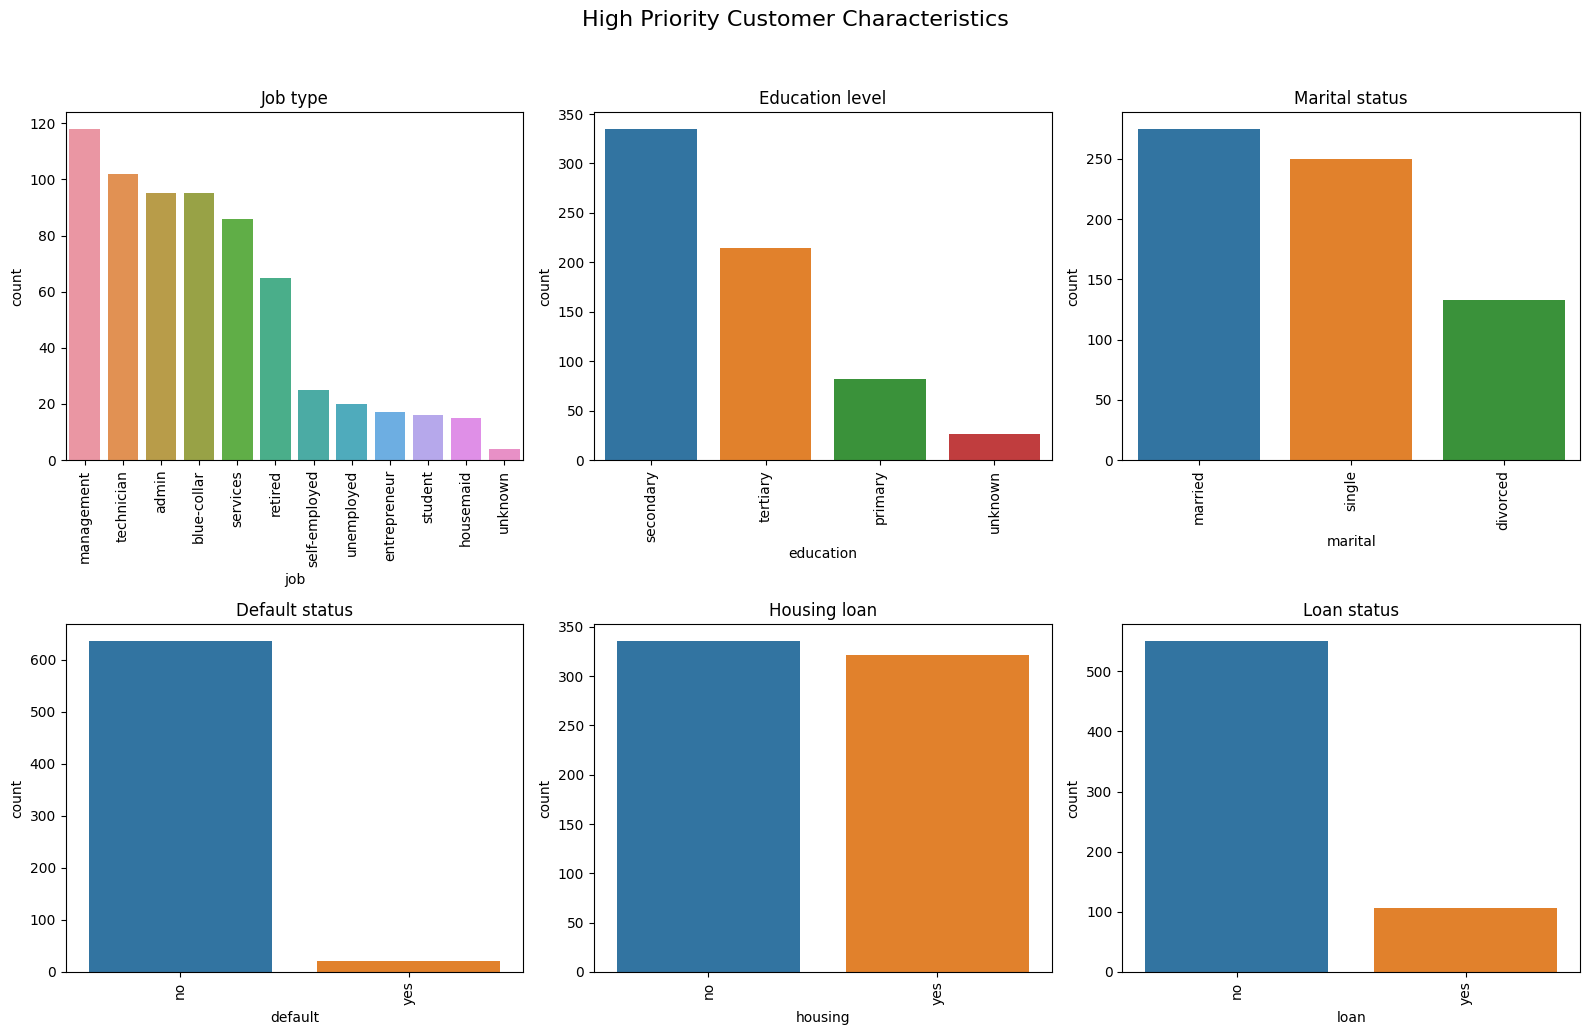

In [5]:
if __name__ == "__main__":


     # Set the path to the trained model
    model_path = os.path.abspath(os.path.join(os.getcwd(),  'models', 'pipeline.joblib'))

     # Load the trained model
    pipeline = joblib.load(model_path)

    # Set the path to the CSV file
    csv_path = os.path.abspath(os.path.join(os.getcwd(), 'data', 'raw', 'term-deposit-marketing-2020.csv'))

    # Load the data
    data = pd.read_csv(csv_path)

    # Prepare target variable
    data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

    # Define feature columns and target column
    X = data.drop(columns=['y','month','day','contact'])
    y = data['y']

    # For a new customer
    new_customer_data = X  
    y_pred = pipeline.predict(new_customer_data)

    # Estimate probabilities
    probabilities = pipeline.predict_proba(new_customer_data)

    # Set a threshold for prioritizing customers
    threshold = 0.7

    # Find customers with a higher probability of subscribing
    high_priority_customers = new_customer_data[probabilities[:, 1] >= threshold]

    # Plot the characteristics of high priority customers
    plot_characteristics(high_priority_customers)